<a href="https://colab.research.google.com/github/21B6000/21B6000_21B6001_21B6026/blob/master/Assignment_2_Build_an_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Make sure your compute resource is set to GPU else you'll need to reset your session from scratch**

---
Group yourself to 3 max, and fill in below details
Group member detail(s): \
1. Rabiatul Adawiah binti Supri - 21B6000
2. Adleen Binti Haji Abdul Mutalip - 21B6001
3. Dk Nur Sorfina Zafirah Binti Pg Shahdani - 21B6026

Some of the concepts may be technically advanced, instead, it is to focus on learning how to effectively use Google Colab for scientific research. Don't fret if you dont understand any of codes written for you.

# Setting up Environment

Task 1: Set Up the Environment \
Import the necessary libraries for the exercise, PyTorch for neural network training.\
Load the CIFAR10 dataset.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from google.colab import files
from PIL import Image

In [ ]:
# Set the device to GPU if available, otherwise, use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
print(f'Using device: {device}')

Using device: cuda


In [ ]:
# Define the modified neural network architecture for CIFAR-10
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(8 * 8 * 32, 128)  # Adjusted for CIFAR-10 image size
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)  # Output size matches the number of CIFAR-10 classes (10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 8 * 8 * 32)  # Adjusted for CIFAR-10 image size
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x


Below are the Hyperparameters for the neural network (think of it as knobs that you can tune to enhance performance)


Task 4: Model debugging (Mess around with these 3 hyperparameters) \
hint: \
LEARNING_RATE: The current value is set to 1e10 (10000000000.0). Try adjusting it to find an optimal learning rate.\
BATCH_SIZE: Set it to a power of 2, such as 16, 32, or 64, to potentially improve training efficiency. \
EPOCH: Consider letting the model train for more epochs. The default value is set to 1; experiment with longer training durations for better convergence and performance evaluation.

In [ ]:
# Function to train the model
losses = []
accuracies = []

def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.to(device)
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_predictions = 0  # Initialize a counter for correct predictions
        total_samples = 0  # Initialize a counter for total samples

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

             # Measure accuracy
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        # Calculate accuracy for the current epoch
        accuracy = 100.0 * correct_predictions / total_samples

        losses.append(running_loss / len(train_loader))
        accuracies.append(accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy}")
    print("Training complete!")


In [ ]:
BATCH_SIZE = 64
LEARNING_RATE = 1e-6
EPOCH = 20

In [ ]:
# Load and preprocess the CFAR10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
#TODO: Complete below line to import CIFAR10 dataset
train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)

Files already downloaded and verified


In [ ]:
train_set.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
# Create the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)

Task 2: Measure performance difference training between GPU and CPU


In [ ]:
# Train the model
train_model(model, train_loader, criterion, optimizer, num_epochs=EPOCH)

Epoch 1/20, Loss: 2.3030, Accuracy: 10.786
Epoch 2/20, Loss: 2.3029, Accuracy: 10.88
Epoch 3/20, Loss: 2.3027, Accuracy: 10.94
Epoch 4/20, Loss: 2.3026, Accuracy: 10.98
Epoch 5/20, Loss: 2.3025, Accuracy: 11.046
Epoch 6/20, Loss: 2.3023, Accuracy: 11.122
Epoch 7/20, Loss: 2.3022, Accuracy: 11.19
Epoch 8/20, Loss: 2.3021, Accuracy: 11.29
Epoch 9/20, Loss: 2.3019, Accuracy: 11.33
Epoch 10/20, Loss: 2.3018, Accuracy: 11.382
Epoch 11/20, Loss: 2.3016, Accuracy: 11.414
Epoch 12/20, Loss: 2.3015, Accuracy: 11.452
Epoch 13/20, Loss: 2.3014, Accuracy: 11.504
Epoch 14/20, Loss: 2.3012, Accuracy: 11.554
Epoch 15/20, Loss: 2.3011, Accuracy: 11.6
Epoch 16/20, Loss: 2.3010, Accuracy: 11.678
Epoch 17/20, Loss: 2.3008, Accuracy: 11.718
Epoch 18/20, Loss: 2.3007, Accuracy: 11.764
Epoch 19/20, Loss: 2.3006, Accuracy: 11.808
Epoch 20/20, Loss: 2.3004, Accuracy: 11.866
Training complete!


Report your findings on:
*   What were the key differences you observed in the training speed between the GPU and CPU?

The training speed of GPU is higher than CPU

*   Were there any challenges or limitations you encountered while using the GPU for training?

No, we did not encountered any problems while using GPU for training.

*   Did you notice any impact on the final model's performance (accuracy, loss) when trained on the GPU versus the CPU?

GPU: 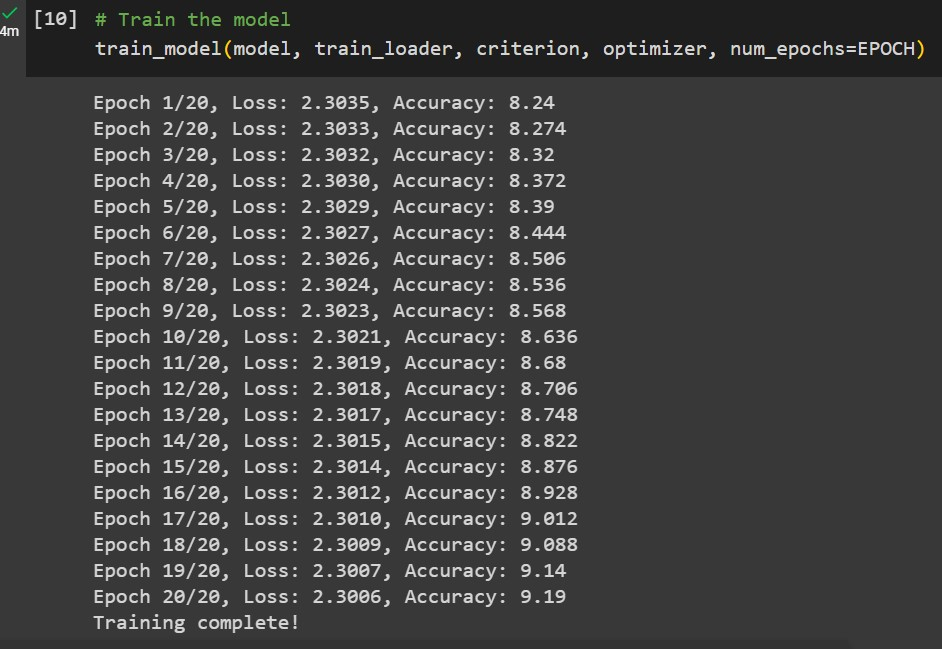

CPU: \
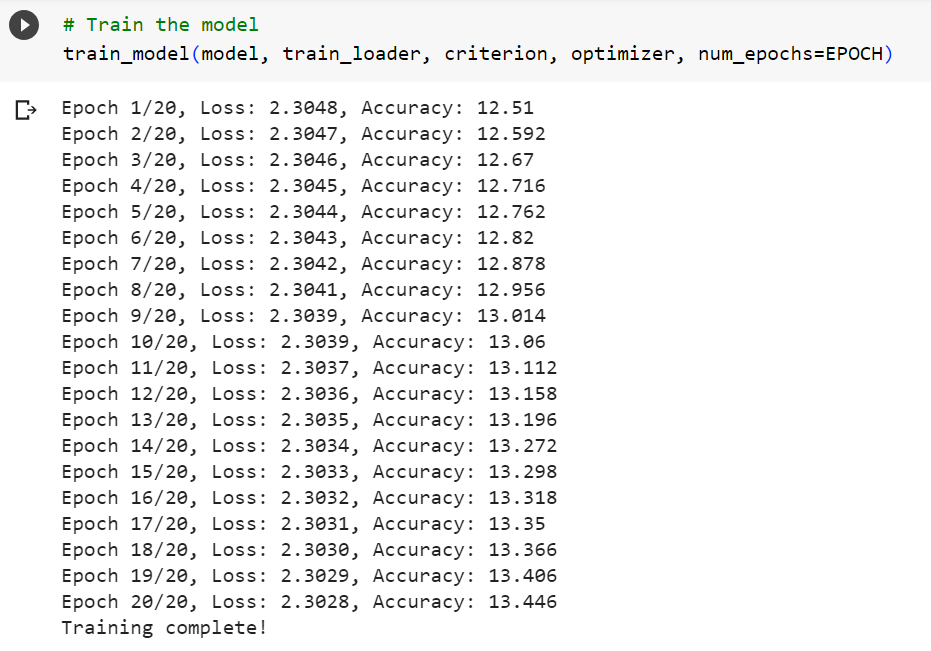

Task 3: Visualize Loss and Accuracy


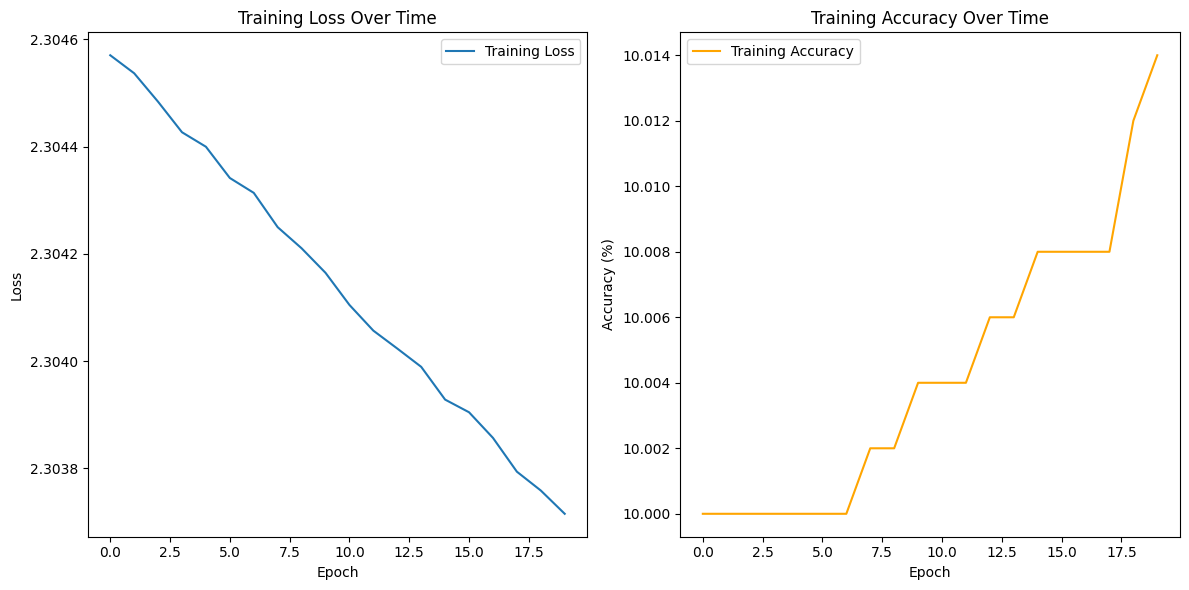

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Training Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy Over Time')
plt.legend()

plt.tight_layout()
plt.show()


Task 4: Test your own Image \
You can use the same code from the tutorial and ensure your model is properly trained!



In [ ]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # Resize the image to match the model input size
    transforms.ToTensor(),  # Convert the image to a tensor
   transforms.Normalize((0.5,), (0.5,)),  # Normalize the image
])

# Function to preprocess and make predictions on the uploaded image
def predict_uploaded_image(upload):
    # Open the uploaded image
    image = Image.open(upload).convert('L')
    # image = Image.open(upload).convert('RGB')
    model.to("cpu")  # Set the model to evaluation mode

    # Preprocess the image
    input_tensor = transform(image)
    input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

    # Make predictions using the model
    with torch.no_grad():
        output = model(input_batch)
    _, predicted_idx = torch.max(output, 1)

    print(f"Predicted labels: {predicted_idx}")

In [ ]:
# Upload an image for prediction
uploaded = files.upload()

# If an image is uploaded, call the prediction function
if len(uploaded) > 0:
    for file_name in uploaded.keys():
        predict_uploaded_image(file_name)
else:
    print("No image uploaded.")

Saving Airplane.jpg to Airplane.jpg


RuntimeError: ignored

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Upload an image
uploaded = files.upload()

# Make predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

# Define class names for CIFAR-10
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Print prediction
print("Predicted class:", class_names[predicted_class])

# If an image is uploaded, call the prediction function
if len(uploaded) > 0:
    for file_name in uploaded.keys():
        predict_uploaded_image(file_name)
else:
    print("No image uploaded.")




KeyboardInterrupt: ignored